In [3]:
import numpy as np
import matplotlib.pyplot as plt

from aeons.tools import pickle_in
samples_g_1, samples_c_1, samples_w_1 = pickle_in("../test_samples/samples_1.pickle")

from aeons.covariance import X_mu, X_Sigmainv, logX_mu
from aeons.true_distribution import generate_Xs, nk_dead, nk_dead_live, nk_live
from aeons.likelihoods import likelihood, linear_like, quad_like, log_like, simple_like, middle_like, full_like
linear, quad, log = linear_like(), quad_like(), log_like()
simple, middle, full = simple_like(), middle_like(), full_like()
from aeons.models import LS, CG

In [4]:
format = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 11pt font in plots, to match 11pt font in document
    "axes.labelsize": 11,
    "font.size": 11,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    'axes.linewidth': 0.5,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'patch.linewidth': 0.5,
    'legend.fancybox': False,
    'legend.shadow': False
}
plt.rcParams.update(format)

In [11]:
def gaussian_L(X, theta):
    d, sigma = theta
    return np.exp(-X**(2/d)/(2*sigma**2))

#### **Plot of killing off live points at end of run**

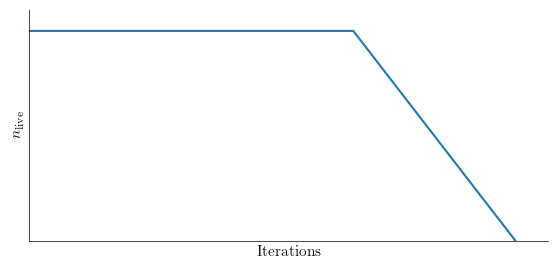

In [ ]:
nk = nk_dead_live(500, 1000)
plt.figure(figsize=(6.7, 3))
plt.plot(nk)
plt.ylim(0, 550)
plt.xlim(0, 1600)
plt.xticks([])
plt.xlabel("Iterations")
plt.yticks([])
plt.ylabel("$n_\mathrm{live}$")
plt.margins(x=0, y=0.01)
plt.savefig('../../../report/figures/nk_dead_live.pdf', format='pdf', bbox_inches='tight')

#### **Plots of mean vs true X for Gaussian likelihood**

In [9]:
nk = nk_dead(nlive=2, ndead=50)
logX_mean = logX_mu(nk)
X_mean = X_mu(nk)

In [10]:
X = generate_Xs(nk)
logX = np.log(X)
d = 10
logL = -X**(2/d)/(2*0.2**2)
L = np.exp(logL)

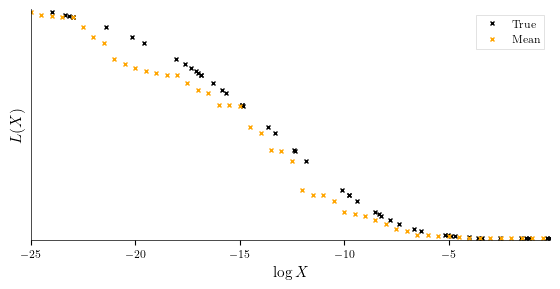

In [18]:
plt.figure(figsize=(6.7, 3))
plt.plot(logX, L, 'x', ms=3, label='True', color='black')
plt.plot(logX_mean, L, 'x', ms=3, label='Mean', color='orange')
plt.yticks([])
plt.ylabel(r'$L(X)$')
plt.xlabel(r'$\log X$')
plt.margins(x=0, y=0.01)
plt.legend();
plt.savefig('mean_vs_true.pdf', format='pdf', bbox_inches='tight')

#### **Generate L(X)X plot**

In [19]:
nk = nk_dead_live(nlive=100, ndead=4000)
logX_mean = logX_mu(nk)

In [20]:
X = generate_Xs(nk)
logX = np.log(X)
d = 10
logL = -X**(2/d)/(2*0.1**2)
L = np.exp(logL)

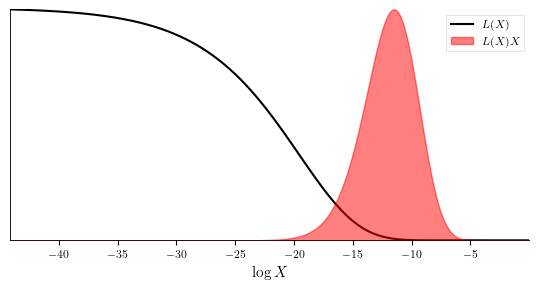

In [21]:
fig, ax1 = plt.subplots(figsize=(6.7, 3))
ax1.plot(logX, L, color='black', label=r"$L(X)$")
ax2 = ax1.twinx()
ax2.fill_between(logX, L*X, lw=1, color='red', alpha=0.5, label=r"$L(X)X$")
for ax in ax1, ax2:
    ax.set_yticks([])
    ax.margins(x=0, y=0)
ax1.set_xlabel(r'$\log X$');
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)
fig.savefig('LX.pdf', format='pdf', bbox_inches='tight')

#### **Large variance in live points**

In [157]:
ndead = 1600
nk = nk_dead_live(nlive=100, ndead=ndead)
X = generate_Xs(nk)
theta_true = [10, 0.1]
logL = middle.func(X, theta_true)
L = np.exp(logL)

In [158]:
nk1 = nk_dead(nlive=100, ndead=2000)
X1 = generate_Xs(nk1)
theta_true = [10, 0.1]
logL1 = middle.func(X1, theta_true)
L1 = np.exp(logL1)

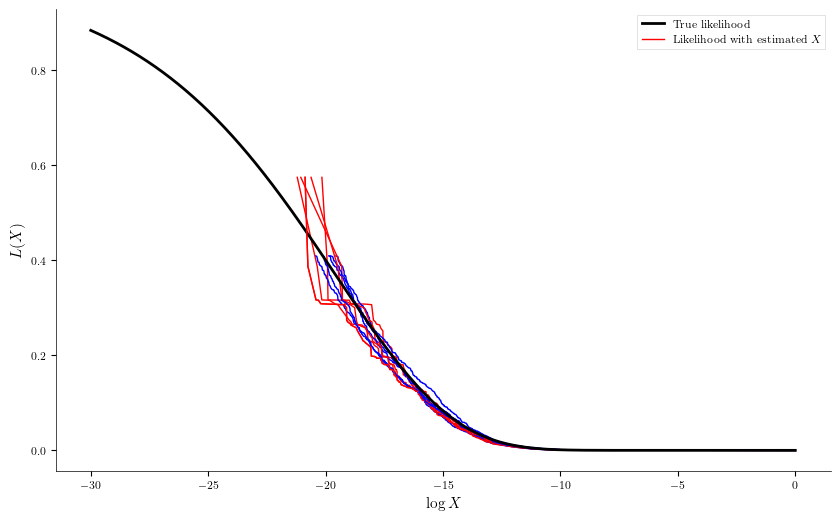

In [162]:


plt.figure(figsize=(10, 6))
for _ in range(5):
    X = generate_Xs(nk)
    logX = np.log(X)
    plt.plot(logX, L, lw=1, color='red')
    X1 = generate_Xs(nk1)
    logX1 = np.log(X1)
    plt.plot(logX1, L1, lw=1, color='blue')
plt.plot(logXarray, gaussian_L(Xarray, [10, 0.1]), color='black', lw=2, label='True likelihood')
plt.plot(logX[ndead:], L[ndead:], lw=1, color='red', label='Likelihood with estimated $X$')
plt.ylabel('$L(X)$')
plt.xlabel('$\log X$')
plt.legend();
# plt.savefig('../../../report/figures/Xlive_variance.pdf', format='pdf', bbox_inches='tight')

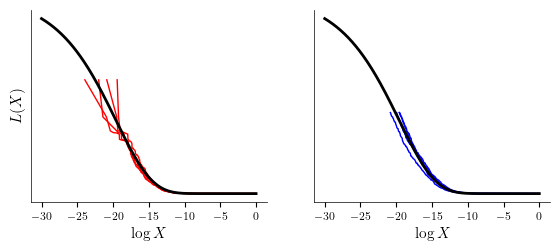

In [197]:
logXarray = np.linspace(-30, 0, 1000)
Xarray = np.exp(logXarray)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(6.7,2.5))
for _ in range(4):
    X = generate_Xs(nk)
    logX = np.log(X)
    ax1.plot(logX, L, lw=1, color='red')
    X1 = generate_Xs(nk1)
    logX1 = np.log(X1)
    ax2.plot(logX1, L1, lw=1, color='blue')
    
for ax in fig.axes:
    ax.set_xlabel('$\log X$')
    ax.set_yticks([])
    ax.plot(logXarray, gaussian_L(Xarray, [10, 0.1]), color='black', lw=2, label='True likelihood')

ax1.set_ylabel(f"$L(X)$")
plt.savefig('../../../report/figures/Xlive_variance.pdf', format='pdf', bbox_inches='tight')